# Chargement des données :

In [ ]:
import pandas as pd

# Charger les données
data = pd.read_csv('/content/diabetic_data.csv')

# Aperçu des données
print("Colonnes du dataset :", data.columns)
print(data.head())


Colonnes du dataset : Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
   encounter_id  patient_nbr             race  

# Analyse exploratoire des données (EDA)


In [ ]:
# Voir le nombre de valeurs manquantes par colonne
print(data.isnull().sum())

# Statistiques descriptives
print(data.describe())

# Aperçu des types de variables
print(data.dtypes)


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Distribution de la variable cible (readmitted)


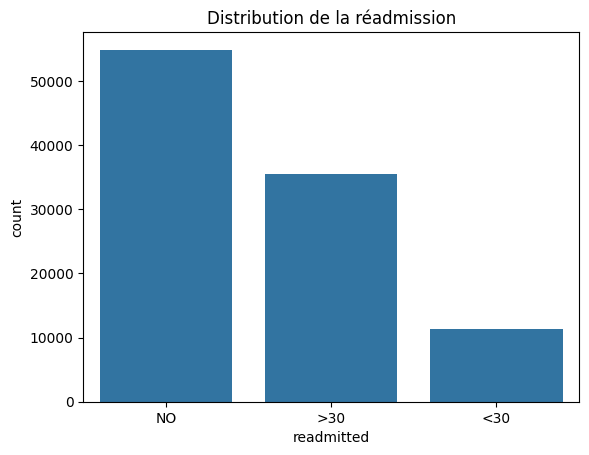

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la variable cible
sns.countplot(x='readmitted', data=data)
plt.title('Distribution de la réadmission')
plt.show()


Analyse des variables numériques


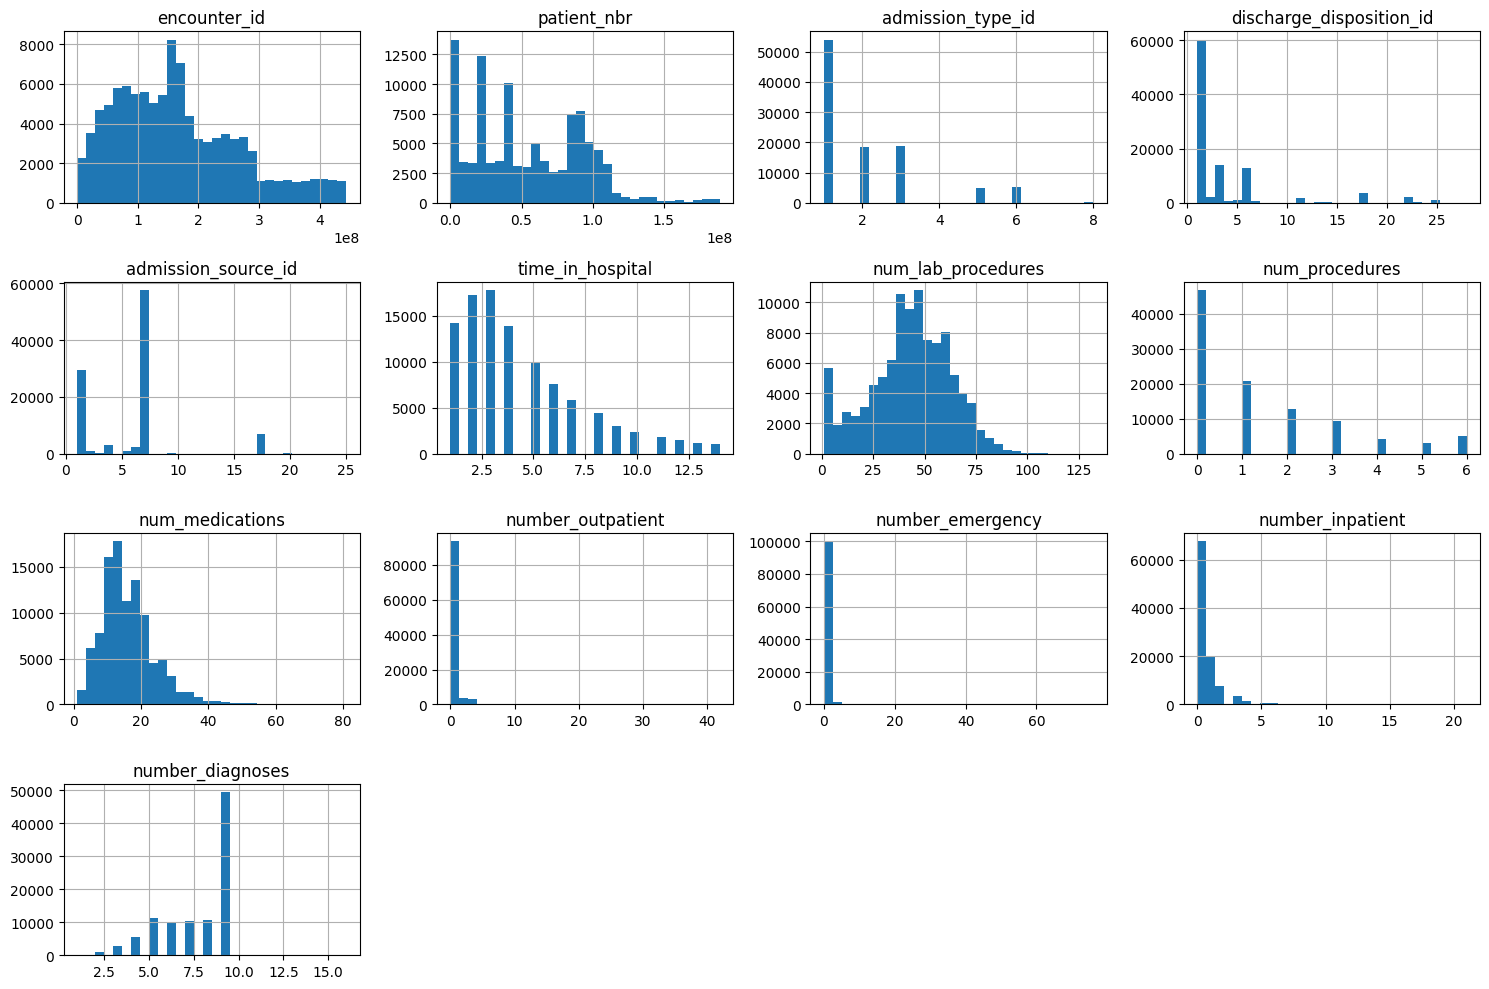

In [ ]:
# Voir les distributions des variables numériques
data.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


Analyse des variables catégorielles


In [ ]:
# Compter les valeurs pour chaque variable catégorielle
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(data[col].value_counts())
    print("\n")


race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64


payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64


medical_special

# Nettoyage des données


In [ ]:
# Supprimer des colonnes inutiles
columns_to_drop = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr', 'diag_2', 'diag_3']
data.drop(columns=columns_to_drop, inplace=True)

# Remplacer les valeurs manquantes
data.fillna(method='ffill', inplace=True)

# Transformer la colonne 'readmitted' en binaire (1 pour réadmission sous 30 jours, 0 sinon)
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Vérifier que les valeurs manquantes ont bien été traitées
print(data.isnull().sum().sum())  # Doit afficher 0


<ipython-input-11-30a7a50abd97>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


159


# Encodage des variables catégorielles

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Sélection des colonnes catégorielles
categorical_cols = data.select_dtypes(include=['object']).columns

# Encodage des colonnes catégorielles
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_cols])

# Transformation en DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concaténer avec les colonnes numériques
data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)


# Division en ensembles d'entraînement et de test

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation entre les features et la variable cible
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


Dimensions de l'ensemble d'entraînement : (81412, 799)
Dimensions de l'ensemble de test : (20354, 799)


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation pour la régression logistique (sur l'ensemble d'entraînement uniquement)
log_reg = LogisticRegression(max_iter=1000)
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Scores de la régression logistique avec cross-validation : ", log_reg_cv_scores)
print("Moyenne des scores (logistic regression):", log_reg_cv_scores.mean())

# Cross-validation pour le Random Forest (sur l'ensemble d'entraînement uniquement)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Scores du Random Forest avec cross-validation : ", rf_cv_scores)
print("Moyenne des scores (Random Forest):", rf_cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Scores de la régression logistique avec cross-validation :  [0.88798133 0.88847264 0.88846579 0.88828154 0.88840437]
Moyenne des scores (logistic regression): 0.8883211343327553
Scores du Random Forest avec cross-validation :  [0.88847264 0.88877971 0.88871146 0.88895713 0.88858863]
Moyenne des scores (Random Forest): 0.888701913126777


# Modèle de base : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Modèle de base
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Précision du modèle de base : {accuracy}")
print("Matrice de confusion :\n", cm)


Précision du modèle de base : 0.8871966198290262
Matrice de confusion :
 [[18028    41]
 [ 2255    30]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Itération : RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner un RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluer le modèle RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Précision du RandomForest : {accuracy_rf}")
print("Matrice de confusion :\n", cm_rf)


Précision du RandomForest : 0.8873931413972683
Matrice de confusion :
 [[18054    15]
 [ 2277     8]]


# Enregistrement des résultats

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-1-fffffb2f4ee5>, line 14)

# Bonus : Suivi des expérimentations avec MLflow

In [ ]:
!pip install mlflow

import mlflow
import mlflow.sklearn

# Suivi des expérimentations
mlflow.set_experiment("Diabetes Readmission Prediction")

with mlflow.start_run():
    # Entraîner et suivre le modèle
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    # Enregistrer les métriques
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    mlflow.log_metric("accuracy", accuracy_rf)

    # Enregistrer le modèle
    mlflow.sklearn.log_model(rf_model, "random_forest_model")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


2024/10/22 09:11:13 INFO mlflow.tracking.fluent: Experiment with name 'Diabetes Readmission Prediction' does not exist. Creating a new experiment.
2024/10/22 09:12:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Courbe D'accuracy sur l'ensemble du Test

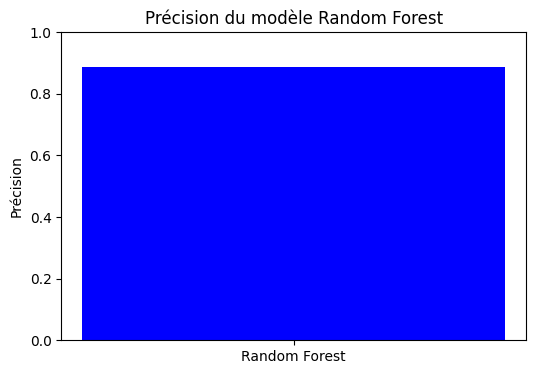

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Calcul de l'accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Tracer l'accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest'], [accuracy_rf], color='blue')
plt.title('Précision du modèle Random Forest')
plt.ylabel('Précision')
plt.ylim(0, 1)
plt.show()


# Courbe ROC

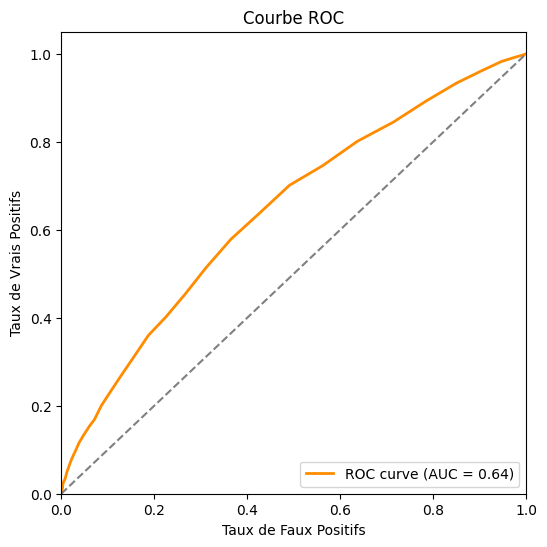

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilités prédites
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


# Matrice de Confusion

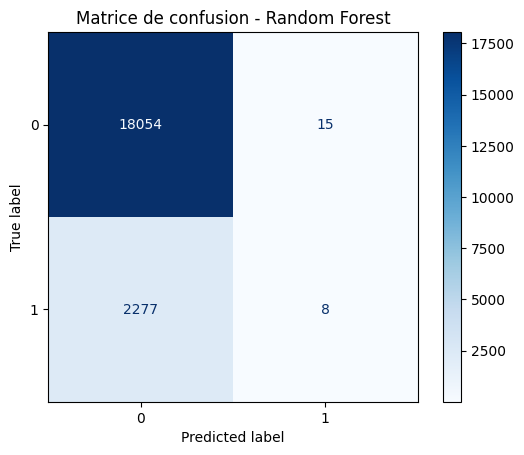

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_rf)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Random Forest")
plt.show()
